Predicted Price for a house size of 1600 sq.ft: 898829.82


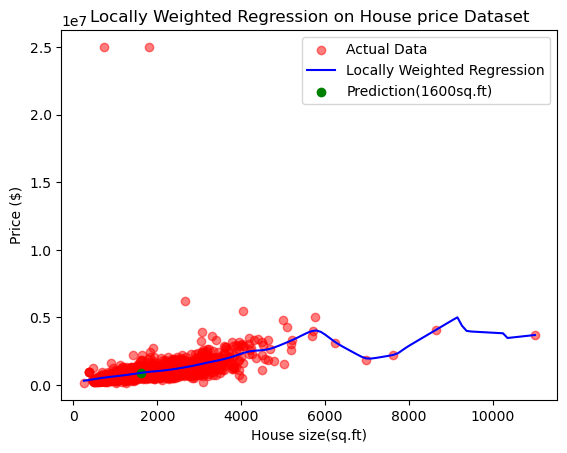

Predicted Price for a house size of 1600 sq.ft: 906414.37


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = "housing.csv"
hsng = pd.read_csv(file_path)

X = hsng["size"].values
y = hsng["price"].values

def locally_weighted_regression(x_query, X, y, tau):
    m = len(X)
    weights = np.exp(-((X - x_query) ** 2) / (2 * tau ** 2)) 
    X_b = np.c_[np.ones(m), X] 
    W = np.diag(weights)
    theta = np.linalg.pinv(X_b.T @ W @ X_b) @ (X_b.T @ W @ y)
    x_query_b = np.array([1, x_query])
    return x_query_b @ theta

tau = 300 
x_query = 1600
predicted_tip = locally_weighted_regression(x_query, X, y, tau)
print(f"Predicted Price for a house size of 1600 sq.ft: {predicted_tip:.2f}")

X_range = np.linspace(X.min(), X.max(), 100)
y_pred = np.array([locally_weighted_regression(x, X, y, tau) for x in X_range])
plt.scatter(X, y, color='red', alpha=0.5, label="Actual Data")
plt.plot(X_range, y_pred, color='blue', label="Locally Weighted Regression")
plt.scatter([x_query], [predicted_tip], color='green', marker='o', label="Prediction(1600sq.ft)")
plt.xlabel("House size(sq.ft)")
plt.ylabel("Price ($)")
plt.legend()
plt.title("Locally Weighted Regression on House price Dataset")
plt.show()

tau = 200 
x_query = 1600
predicted_tip = locally_weighted_regression(x_query, X, y, tau)
print(f"Predicted Price for a house size of 1600 sq.ft: {predicted_tip:.2f}")

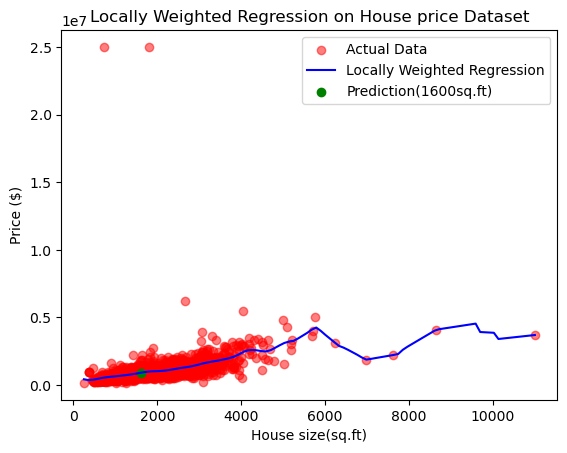

In [19]:
X_range = np.linspace(X.min(), X.max(), 100)
y_pred = np.array([locally_weighted_regression(x, X, y, tau) for x in X_range])
plt.scatter(X, y, color='red', alpha=0.5, label="Actual Data")
plt.plot(X_range, y_pred, color='blue', label="Locally Weighted Regression")
plt.scatter([x_query], [predicted_tip], color='green', marker='o', label="Prediction(1600sq.ft)")
plt.xlabel("House size(sq.ft)")
plt.ylabel("Price ($)")
plt.legend()
plt.title("Locally Weighted Regression on House price Dataset")
plt.show()